In [1]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

# CliMAF: Climate Model Assessment Framework
### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Development team: Stéphane Sénési (CNRM-GAME), Gaëlle Rigoudy (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL), Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##   
##### contact: climaf@meteo.fr
##### users list: climaf-users@meteo.fr

# Getting started with ts_plot()

In [2]:
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/ts_plot_example.png')

## Outline
- 1. basic plot
    -   1.a: Different python objects handled by ts_plot (link with ts_plot doc)
    -   1.b: Change figure size and plot margins
- 2. Customize the plot
    -   2.a: edit the titles, labels, and axis
    -   2.b: lines colors, thickness, patterns and transparency
    -   2.c: highlight a period
    -   customize the legend: see section 3.c
- 3. Plotting multiple lines: an example with an ensemble
    -   3.a: plot an ensemble
    -   3.b: add the ensemble mean and control the colors
    -   3.c: customize the legend
    
## Also see CliMAF documentation on ts_plot:
https://climaf.readthedocs.io/en/master/functions_results_viewing.html?#ts-plot-shortcut-for-ensemble-ts-plot

which is a shortcut for ensemble_ts_plot script:

https://climaf.readthedocs.io/en/master/scripts/ensemble_ts_plot.html

#  

## List of all options available

Lines:
- colors: list of colors
- lw: lines thicknesses
- alphas: lines opacity
- linestyles: lines styles
- highlight_period: Highlight a period on a time series (thicker line) ; provide the list of periods yearstart_yearend  (Ex: ['1980_2005','1990_2000'] to highlight the first period on the first dataset, and the second period on the second dataset)
- highlight_period_lw: Thickness of the highlighted period
- time_offset : Add a time offset to the beginning of the time series

General settings:
- min, max: minimum and maximum value
- offset, scale: apply an offset and a scale to all your time series
- xlim: Provide the start date and end date to force the X axis. Ex: 1950-01-01,2005-12-31
- ylim: Provide the interval for the Y axis
- xlabel, ylabel: X and Y axis label
- xlabel_fontsize, ylabel_fontsize: X and Y axis label size
- tick_size: Ticks size
- fig_size: Size of the figure in inches => width*height Ex: 15*5

Text:
- text: add some text in the plot; the user provides a triplet separared with commas x,y,text; separate the triplets with | if you want to provide multiple texts. Ex: x1,y1,text1|x2,y2,text2
- text_fontsize: fontsize of the text (list if more than one)
- text_colors: color of the text (list if more than one)
- text_verticalalignment: Vertical alignment of the text (list if more than one)
- text_horizontalalignment: Horizontal alignment of the text (list if more than one)

Titles:
- left_string: Left string (used as title by default)
- right_string: Right string
- center_string: Center string
- left_string_fontsize: Left string size
- right_string_fontsize: Right string size
- center_string_fontsize: Center string size

Legend:
- draw_legend: Draw the legend? True/False
- legend_colors: legend colors separated by commas
- legend_labels: Labels of the legend
- legend_xy_pos: x,y Position of the corner of the box (by default = upper left corner). Example= “1.02,1”
- legend_loc: Choose the corner of the legend box to specify the position of the legend box; by default 2 (upper left corner), take values 1, 2, 3 or 4 (see resource loc of pyplot legend)
- legend_fontsize: Font size in the legend
- legend_ncol: Number of columns in the legend
- legend_frame: Draw the box around the legend? True/False
- legend_lw: Line widths (provide either one for all, or one by time series separated by commas)
- append_custom_legend_to_default: Append the custom legend to the default one? True/False

Control margins:
- left_margin: Position of the left border of the figure in the plot
- right_margin: Position of the right border of the figure in the plot
- bottom_margin: Position of the bottom border of the figure in the plot
- top_margin: Position of the top border of the figure in the plot

Horizontal and vertical lines:
- horizontal_lines_values: Y values for horizontal lines
- horizontal_lines_styles: Horizontal lines styles
- horizontal_lines_lw: Horizontal lines thickness
- horizontal_lines_colors: Horizontal lines colors
- vertical_lines_values: Y values for vertical lines
- vertical_lines_styles: vertical lines styles
- vertical_lines_lw: vertical lines thickness
- vertical_lines_colors: vertical lines colors

## Import climaf

In [3]:
from climaf.api import *
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

python => 2.7.15 | packaged by conda-forge | (default, Jul  2 2019, 00:39:44) 
[GCC 7.3.0]
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.6.2 => /modfs/modtools-phw/miniconda2/envs/analyse_2.7/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /prodigfs/ipslfs/dods/jservon/miniconda/envs/cesmep_env/bin/ncdump
Check stamping requirements
nco (ncatted) found -> /opt/nco-4.5.2/bin/ncatted
convert found -> /usr/bin/convert
pdftk found -> /usr/bin/pdftk
exiv2 found -> /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V2.0.0/bin/exiv2
---
CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V2.0.0


CliMAF version = 2.0.0
Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


#  

## 0. Get a dataset and compute a global average annual mean time series

In [4]:
dat = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
         period='1950-2005', variable='tos', realm='ocean' )
ts_dat = ccdo(space_average(dat), operator='yearmean')

#  
## 1. Basic plot
In this section we will see the basis to draw a time series plot with ts_plot:
    -   1.a: Different python objects handled by ts_plot
    -   1.b: Change figure size and plot margins

### 1.a: Different python objects handled by ts_plot
CliMAF documentation for ts_plot: https://climaf.readthedocs.io/en/master/functions_results_viewing.html?highlight=TS_PLOT#ts-plot-shortcut-for-ensemble-ts-plot

### Simple CliMAF object

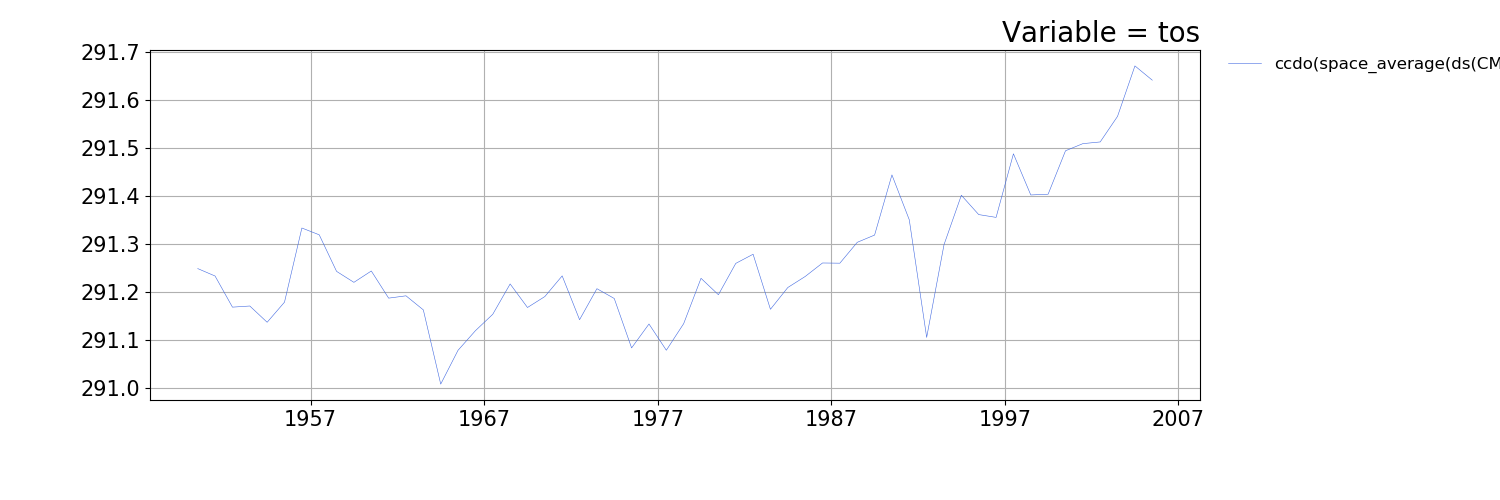

In [5]:
# -- Trivial example: ts_dat is a CliMAF object
myplot = ts_plot(ts_dat)
iplot(myplot)

In [6]:
!cat last.out

==> args =  Namespace(alphas='', append_custom_legend_to_default='', bottom_margin='', center_string='', center_string_fontsize='', colors='', draw_legend='', fig_size='', filenames='/data/jservon/climafcache/6a/4725008e5d293469790fa2c0aaed6dc014ef7093c16a47603e9482.nc', highlight_period='', highlight_period_lw='', horizontal_lines_colors='', horizontal_lines_lw='', horizontal_lines_styles='', horizontal_lines_values='', labels='"ccdo(space_average(ds(CMIP5%%tos%1950-2005%global%/bdd%CNRM-CM5%*%historical%r1i1p1%monthly%ocean%v20130101)),operator=yearmean)"', left_margin='', left_string='Sea Surface Temperature', left_string_fontsize='30', legend_colors='', legend_fontsize='', legend_frame='', legend_labels='', legend_loc='', legend_lw='', legend_ncol='', legend_xy_pos='', linestyles='', lw='', max='', min='', offset='-273.15', outfig='/data/jservon/climafcache/75/d24e74bf74bcda03f4c32291ea9d43fc3e186aa8b61a41dca55e64_27813.png', right_margin='', right_string='model = CNRM-CM5', right_

### List of CliMAF objects

### One object...

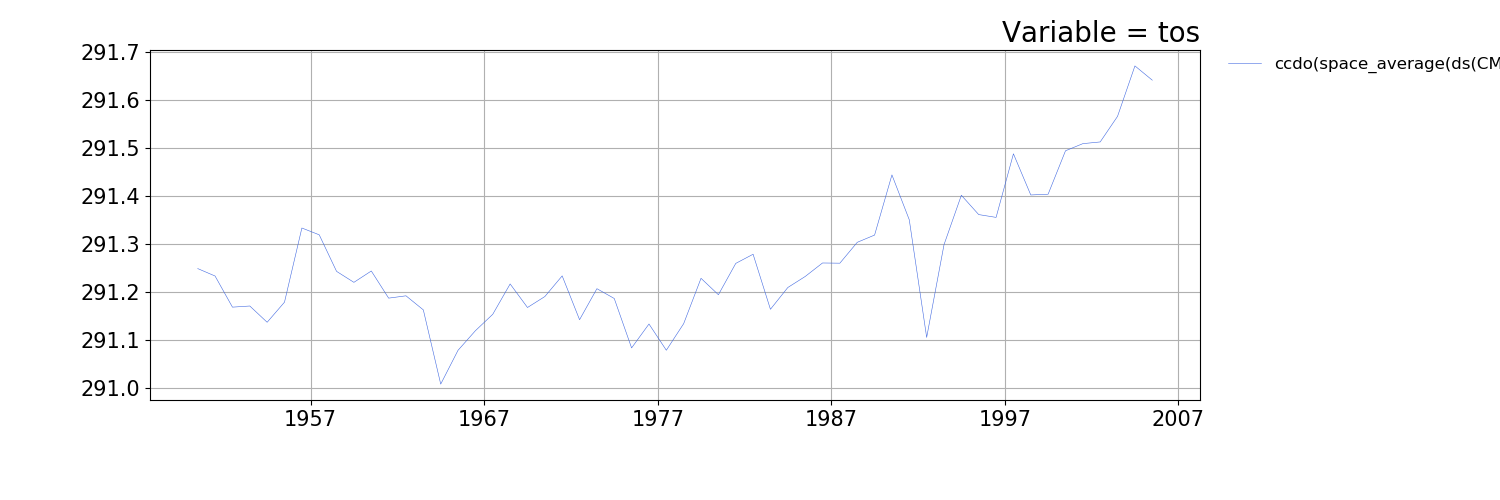

In [7]:
# -- Possibility to provide one, or more
# -- By default ts_plot uses the CRS of the CliMAF object for the legend
myplot = ts_plot( [ts_dat] )
iplot(myplot)

### ... or several

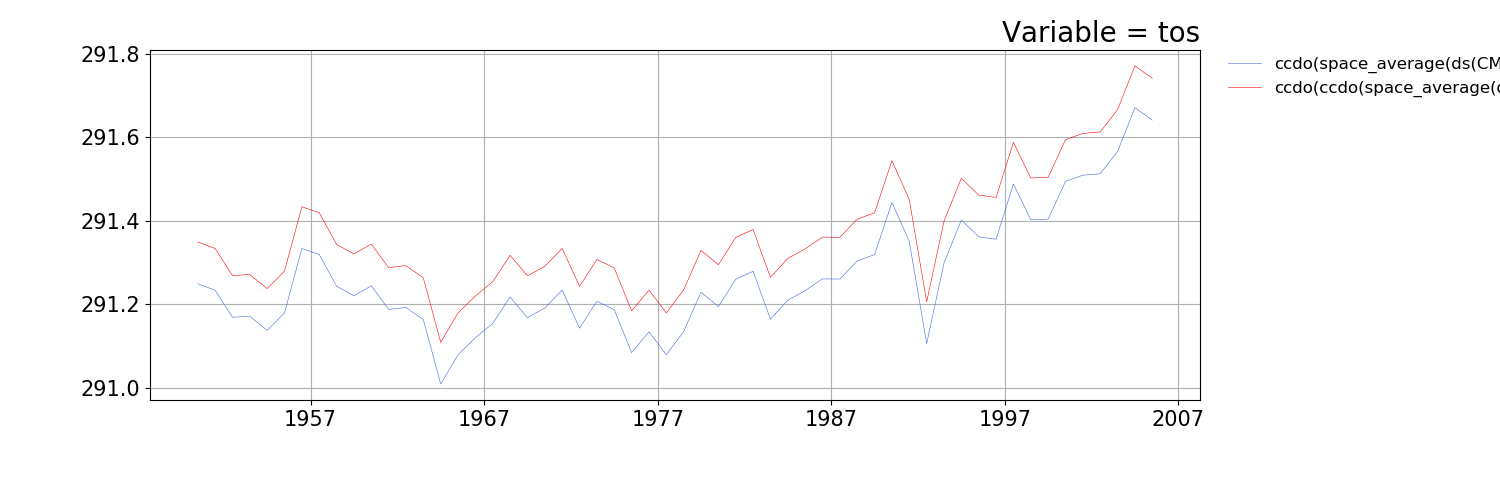

In [8]:
# -- It is possible to provide more than one to plot multiple time series
# -- !!! can't provide twice the same object within the same list
myplot = ts_plot( [ts_dat, fadd(ts_dat, 0.1)] )
iplot(myplot)

### Python dictionary with explicit names for the legend

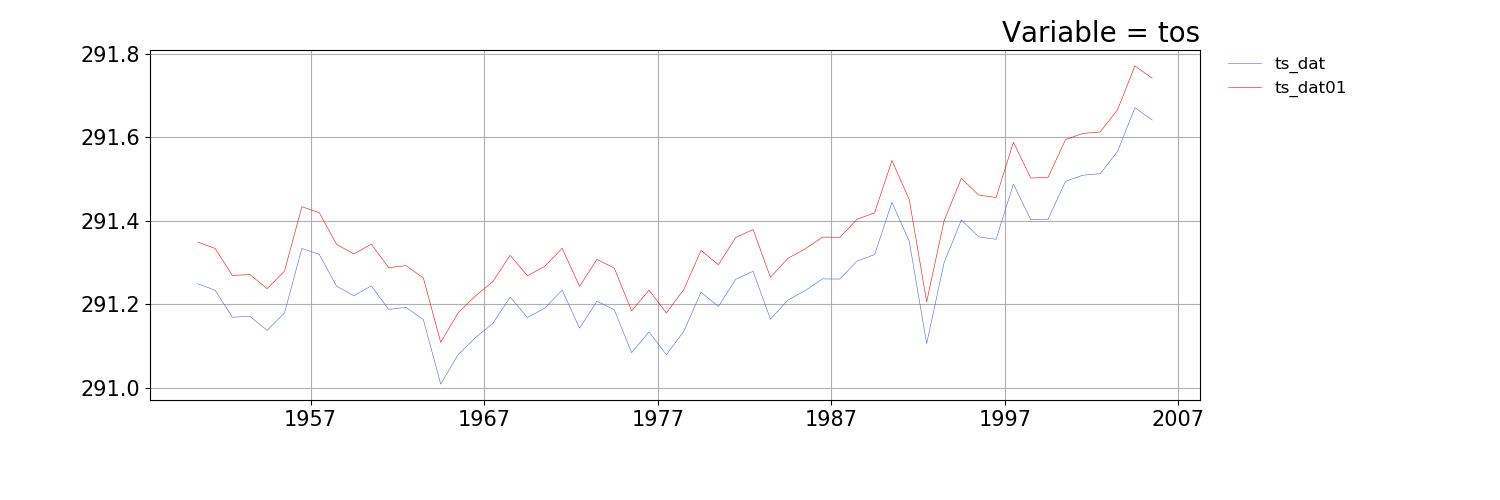

In [9]:
# -- It is possible to provide more than one to plot multiple time series
# -- Unlike with list, yoiu can provide the same object twice but with different names
myplot = ts_plot( dict(ts_dat=ts_dat, ts_dat01=fadd(ts_dat, 0.1) ) ) #ts_dat01=ts_dat
iplot(myplot)

### CliMAF ensemble

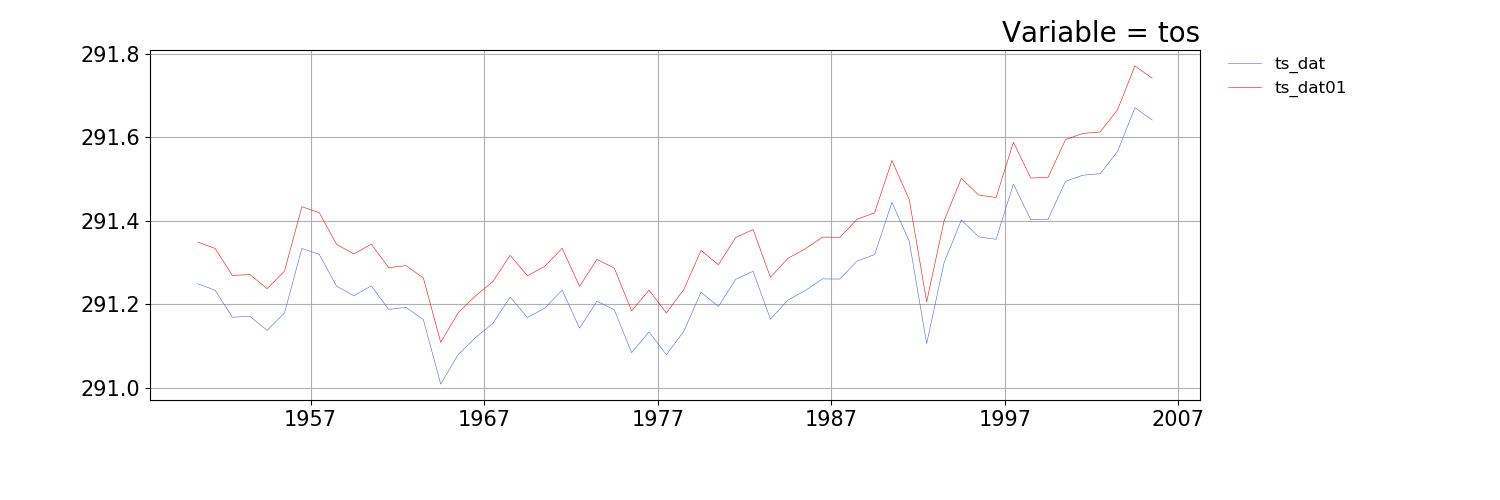

In [10]:
# -- Same principle as a python dictionary but with a specified order
myplot = ts_plot( cens( dict(ts_dat=ts_dat, ts_dat01=fadd(ts_dat, 0.1) ), order=['ts_dat','ts_dat01'] ) )
iplot(myplot)

### 1.b: Control figure size and plot margins

We control the size of the figure and the X/Y ratio with fig_size.

By default, fig_size = '15*5', which means 15 inches in length and 5 in height.

Let's change it for '15*10'

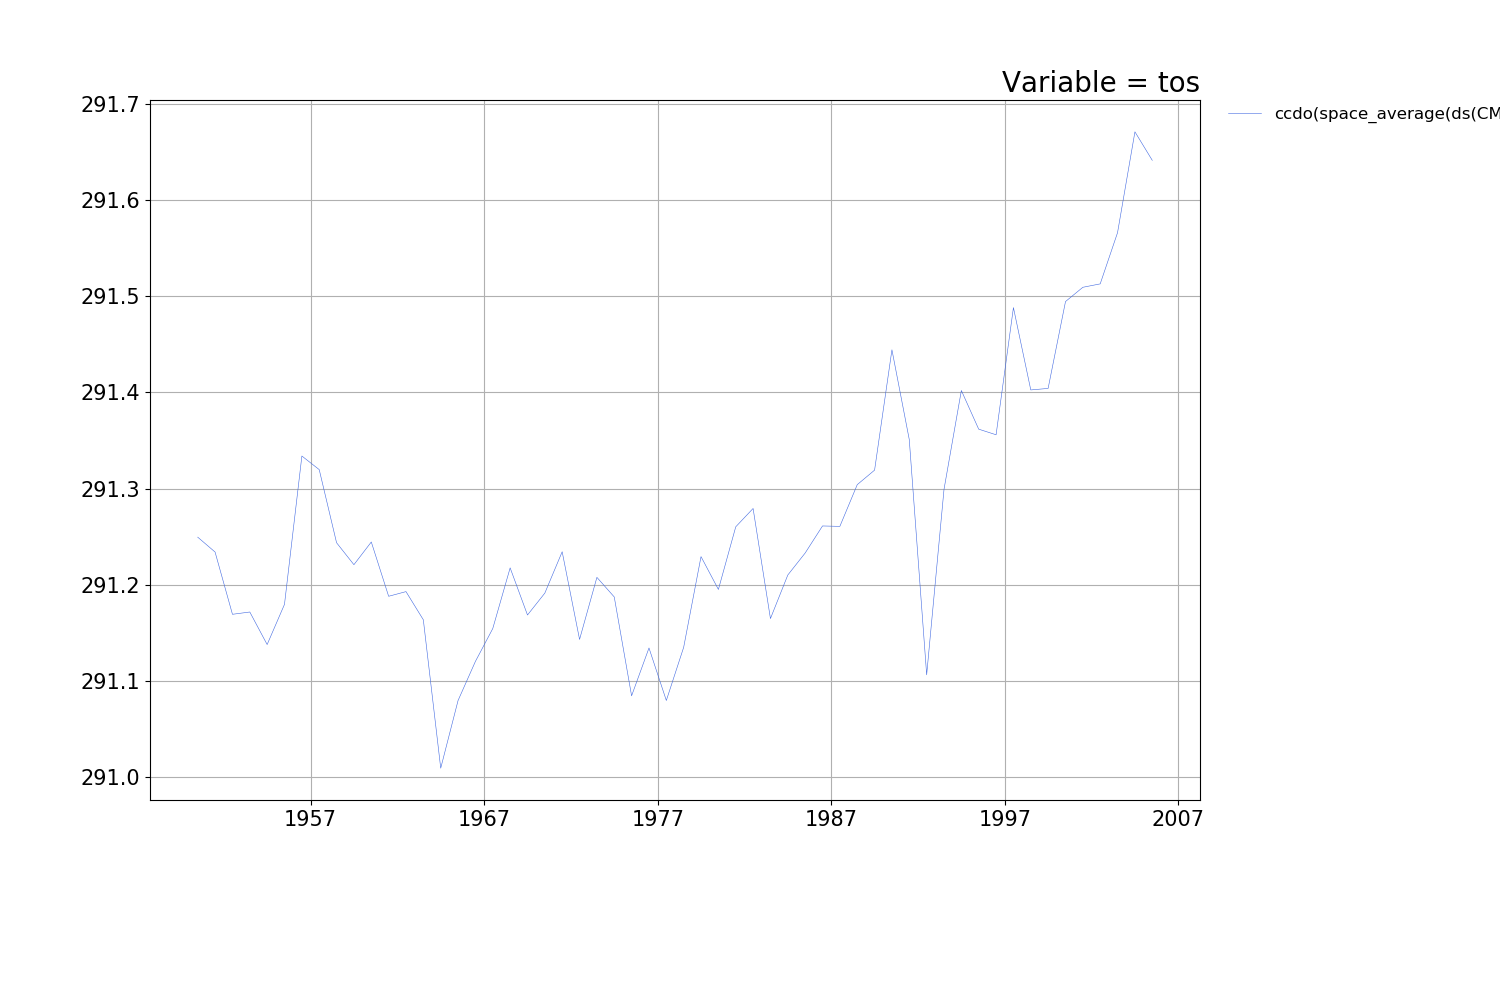

In [11]:
myplot = ts_plot(ts_dat,
                 fig_size = '15*10',
                )
iplot(myplot)

We control the width of the margins with (left,right,bottom,top)_margin.

The value is the position of the axis within the coordinates of the frame, with:

for left_margin and right_margin:
- left border: 0
- right border: 1

for bottom_margin and top_margin:
- bottom border: 0
- top border: 1

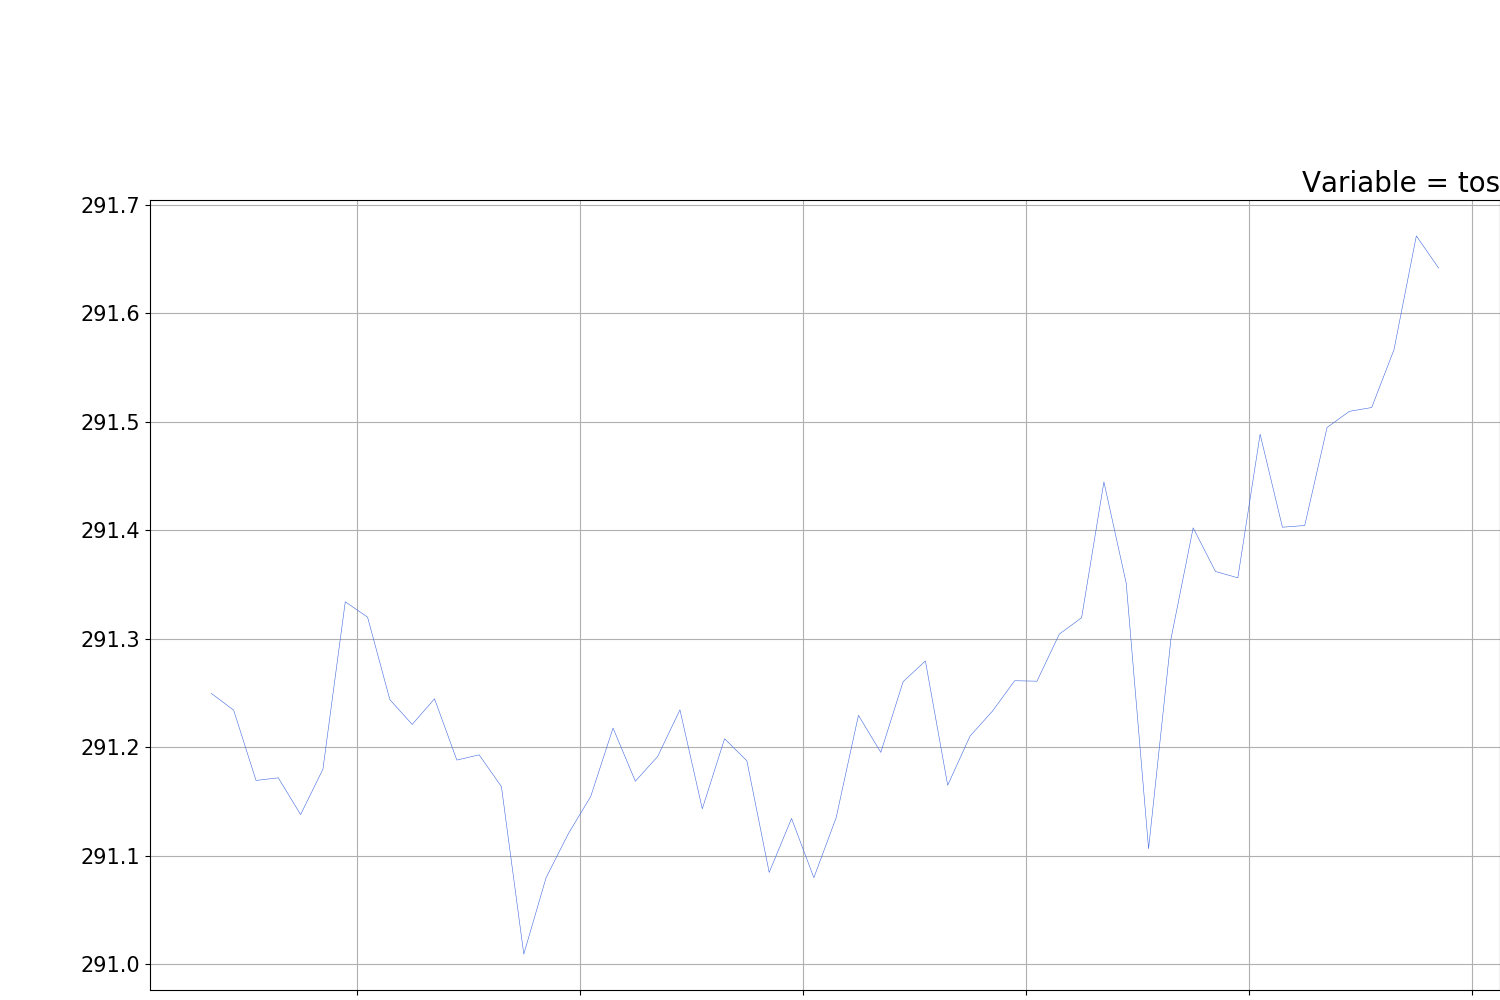

In [12]:
myplot = ts_plot(ts_dat,
                 fig_size = '15*10',
                 left_margin = 0.1,
                 right_margin = 1,
                 bottom_margin = 0.01,
                 top_margin = 0.8
                )
iplot(myplot)

#  
## 2. Customize the plot

### 2.a: edit the titles, labels and axis
- offset, scale the value of the data
- x and y limits of the plot
- x and y axis labels
- titles

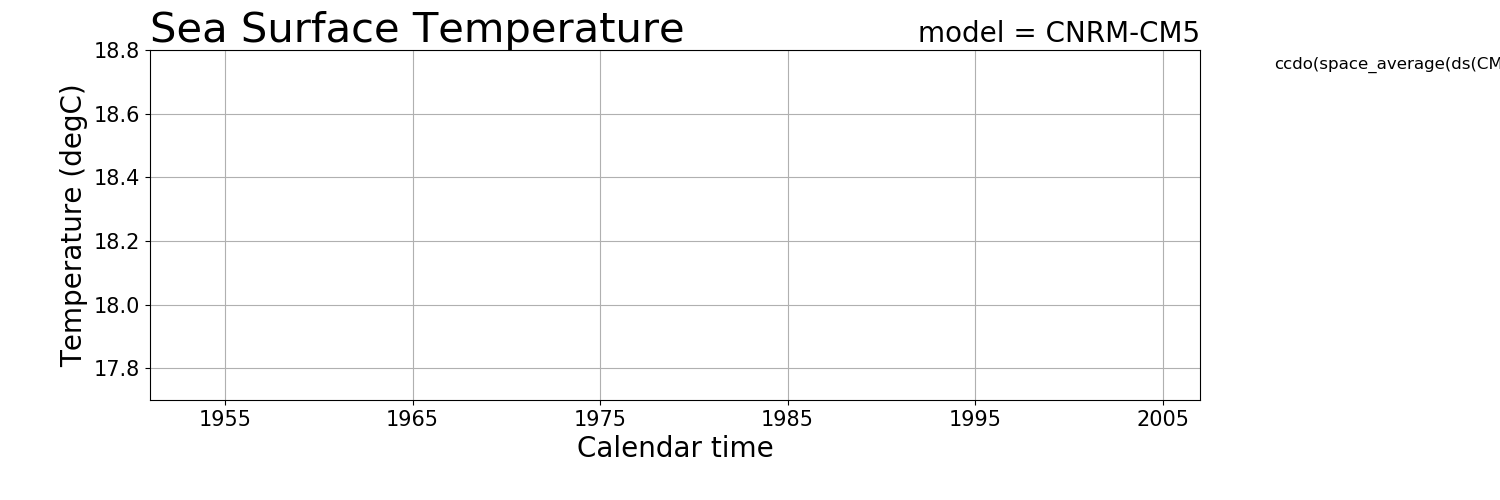

In [13]:
myplot = ts_plot(ts_dat,
                     offset = -273.15,
                     # - X and Y limits
                     xlim = ['1951-01-01','2006-12-31'],
                     ylim = [17.7,18.8],
                     # -- X and Y labels
                     xlabel = 'Calendar time',
                     ylabel = 'Temperature (degC)',
                     # -- Title strings
                     left_string = 'Sea Surface Temperature',
                     right_string = 'model = '+dat.model,
                     left_string_fontsize = 30,
                     right_string_fontsize = 20
                     #center_string = '',
                     #center_string_fontsize: Center string size
                )
iplot(myplot)

### 2.b: lines colors, thickness, styles and transparency

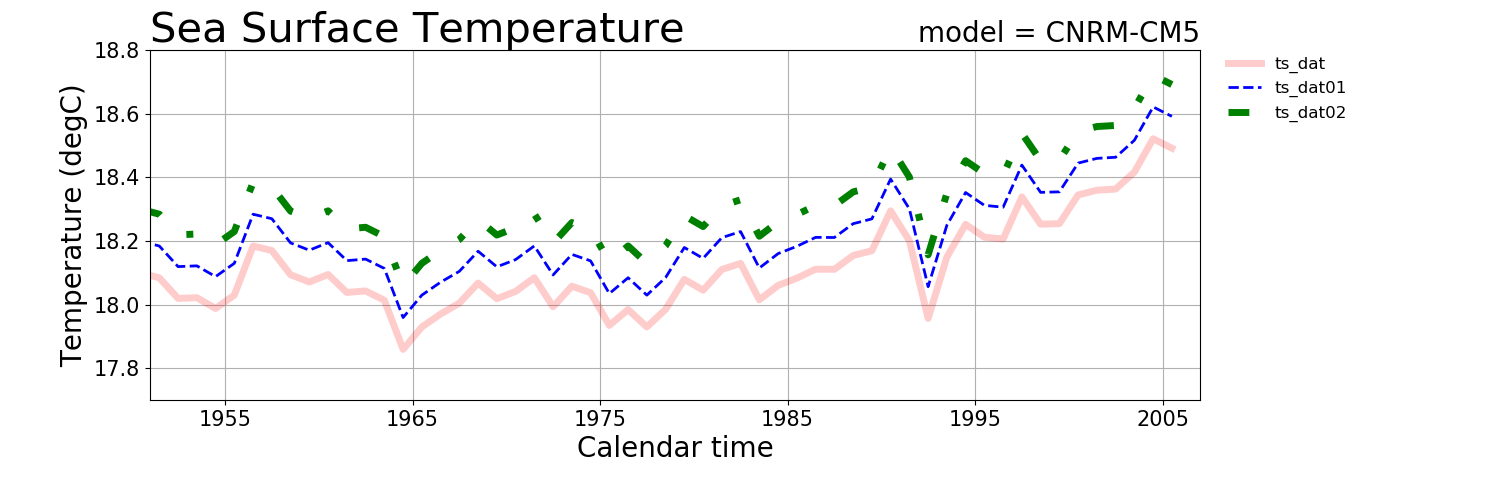

In [14]:
myplot = ts_plot(dict(ts_dat=ts_dat,
                      ts_dat01=fadd(ts_dat, 0.1),
                      ts_dat02=fadd(ts_dat, 0.2) ),
                 offset = -273.15,
                 xlim = ['1951-01-01','2006-12-31'],
                 ylim = [17.7,18.8],
                 xlabel = 'Calendar time',
                 ylabel = 'Temperature (degC)',
                 left_string = 'Sea Surface Temperature',
                 right_string = 'model = '+dat.model,
                 left_string_fontsize = 30,
                 right_string_fontsize = 20,
                     # -- Colors (use python colors: https://python-graph-gallery.com/python-colors/)
                     colors = ['red','blue','green'],
                     # -- Line widths: default is 1
                     lw = [5,2,5],
                     # -- Line styles: have a look at this page to see the values you can use to specify the line styles:
                     #    https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
                     #    Note: if you want to use a tuple, like (0,(3,5,1,5)), you should use a string
                     #    with values separated with dash, like '0-3-5-1-5'
                     linestyles=['solid','dashed','0-3-5-1-5'], #,
                     # -- Alphas: line opacity
                     #      -> 0 transparent
                     #      -> 1 opac
                     alphas = [0.2, 1, 1],
                )
iplot(myplot)

### 2.c: highlight a period with a thicker line

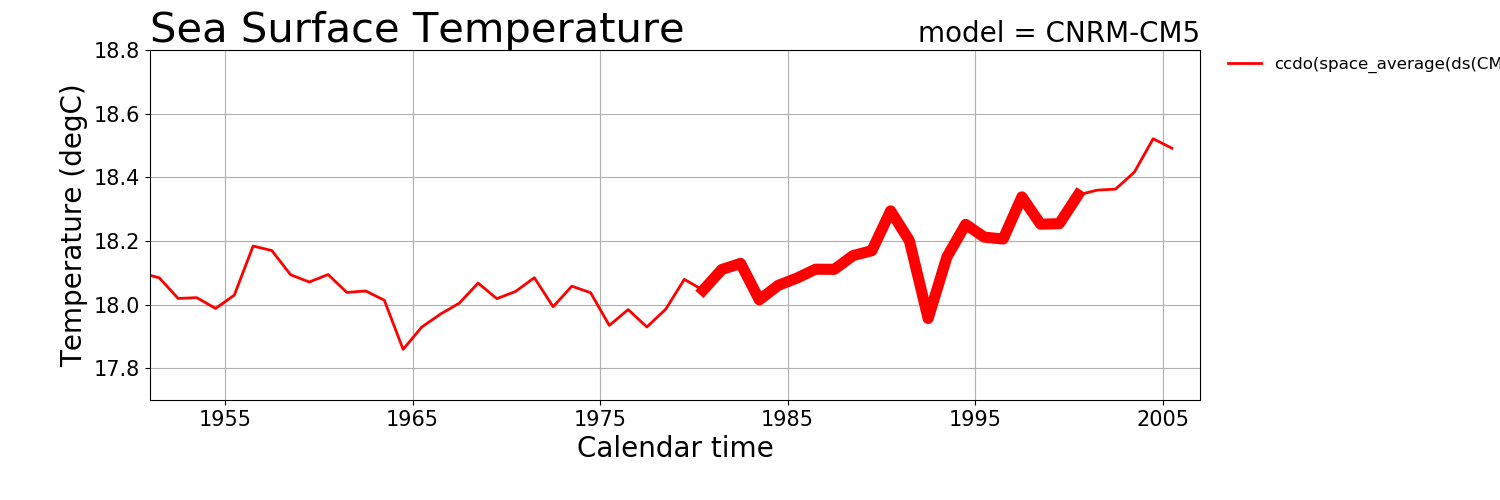

In [15]:
myplot = ts_plot(ts_dat,
                 offset = -273.15,
                 xlim = ['1951-01-01','2006-12-31'],
                 ylim = [17.7,18.8],
                 xlabel = 'Calendar time',
                 ylabel = 'Temperature (degC)',
                 left_string = 'Sea Surface Temperature',
                 right_string = 'model = '+dat.model,
                 left_string_fontsize = 30,
                 right_string_fontsize = 20,
                 #center_string = '',
                 #center_string_fontsize: Center string size
                 colors = 'red',
                 lw = 2,
                     highlight_period = '1980-2000',
                     highlight_period_lw = 8,
                )
iplot(myplot)

## 3. Plot an ensemble
In this section we will see some tricks specific to the use of ensembles.

### Note that all the time series don't need to be part of the same ensemble, it is just a way to plot all of them at once.

In [16]:
# - Let's start by getting an ensemble
ens_req = ds(project='CMIP6',
             model='IPSL-CM6A-LR',
             experiment='historical',
             table='Omon',
             period='1900-2010',
             variable='tos',
             realization='*'
            )
from natsort import natsorted
ens = ens_req.explore('ensemble')
ens.order = natsorted(ens.order)

# -- Compute annual mean global average
ts_ens = ccdo(space_average(ens), operator='yearmean')

## 3.a: Trivial plot

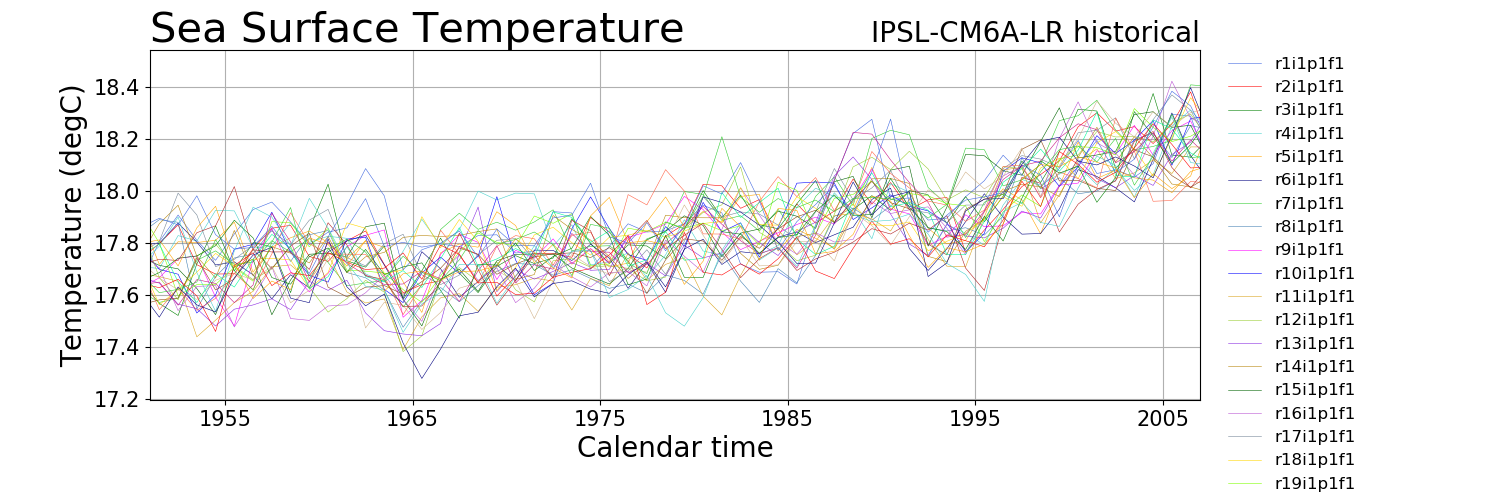

In [17]:
myplot = ts_plot(ts_ens,
                 offset = -273.15,
                 xlim = ['1951-01-01','2006-12-31'],
                 #ylim = [17.7,18.8],
                 xlabel = 'Calendar time',
                 ylabel = 'Temperature (degC)',
                 left_string = 'Sea Surface Temperature',
                 right_string = 'IPSL-CM6A-LR historical',
                 left_string_fontsize = 30,
                 right_string_fontsize = 20,
                )
iplot(myplot)

## 3.b: adding the ensemble mean to the plot
We use this example to show how to add a time series to an existing ensemble, and specify line specs to a plut with many lines.

In [18]:
# -- We start by computing the ensemble mean
ensmean = ccdo_ens(ts_ens, operator='ensmean')

# -- The easiest thing to do is to keep the ensemble (with all the time series),
#    and add the ensemble mean.
#    HOWEVER, you can't add the ensemble mean of an ensemble to this same ensemble.
#    We thus copy the original ensemble to create an ens4plot ensemble for the plot
ens4plot = ts_ens.copy()
# -- And add the ensemble mean like this
ens4plot['ensmean'] = ensmean

In [19]:
# -- ts_plot will use ens4plot.order to specify the order for the plotting.
#    By default, the last element added to the ensemble is at the end of the .order list.
ens4plot.order
#    Knowing this, you can specify a specific color and line width for the last element of the ensemble
#    with the last value of the colors and lw lists:

[u'r1i1p1f1',
 u'r2i1p1f1',
 u'r3i1p1f1',
 u'r4i1p1f1',
 u'r5i1p1f1',
 u'r6i1p1f1',
 u'r7i1p1f1',
 u'r8i1p1f1',
 u'r9i1p1f1',
 u'r10i1p1f1',
 u'r11i1p1f1',
 u'r12i1p1f1',
 u'r13i1p1f1',
 u'r14i1p1f1',
 u'r15i1p1f1',
 u'r16i1p1f1',
 u'r17i1p1f1',
 u'r18i1p1f1',
 u'r19i1p1f1',
 u'r20i1p1f1',
 u'r21i1p1f1',
 u'r22i1p1f1',
 u'r23i1p1f1',
 u'r24i1p1f1',
 u'r25i1p1f1',
 u'r26i1p1f1',
 u'r27i1p1f1',
 u'r28i1p1f1',
 u'r29i1p1f1',
 u'r30i1p1f1',
 u'r31i1p1f1',
 u'r32i1p1f1',
 'ensmean']

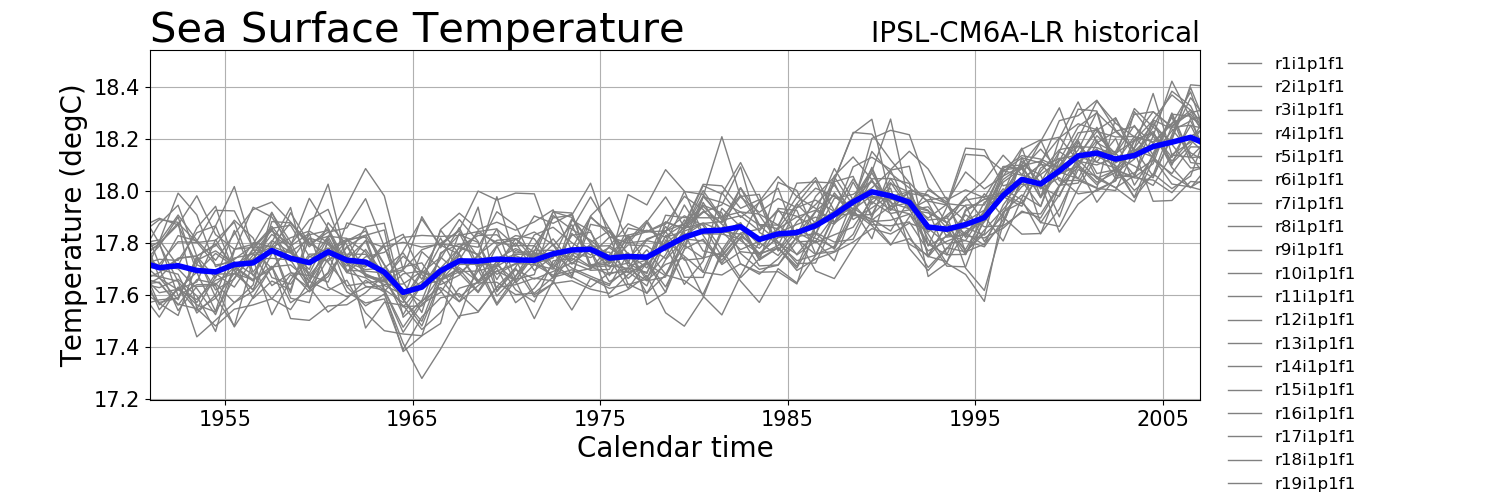

In [20]:
myplot = ts_plot(ens4plot,
                 offset = -273.15,
                 xlim = ['1951-01-01','2006-12-31'],
                 #ylim = [17.7,18.8],
                 xlabel = 'Calendar time',
                 ylabel = 'Temperature (degC)',
                 left_string = 'Sea Surface Temperature',
                 right_string = 'IPSL-CM6A-LR historical',
                 left_string_fontsize = 30,
                 right_string_fontsize = 20,
                     colors = ['grey']*len(ts_ens) + ['blue'],
                     lw = [1]*len(ts_ens) + [4]
                )
iplot(myplot)

## 3.c: customize the legend
### It is possible to specify explicitely the legend instead of using the default legend (sometimes too busy):

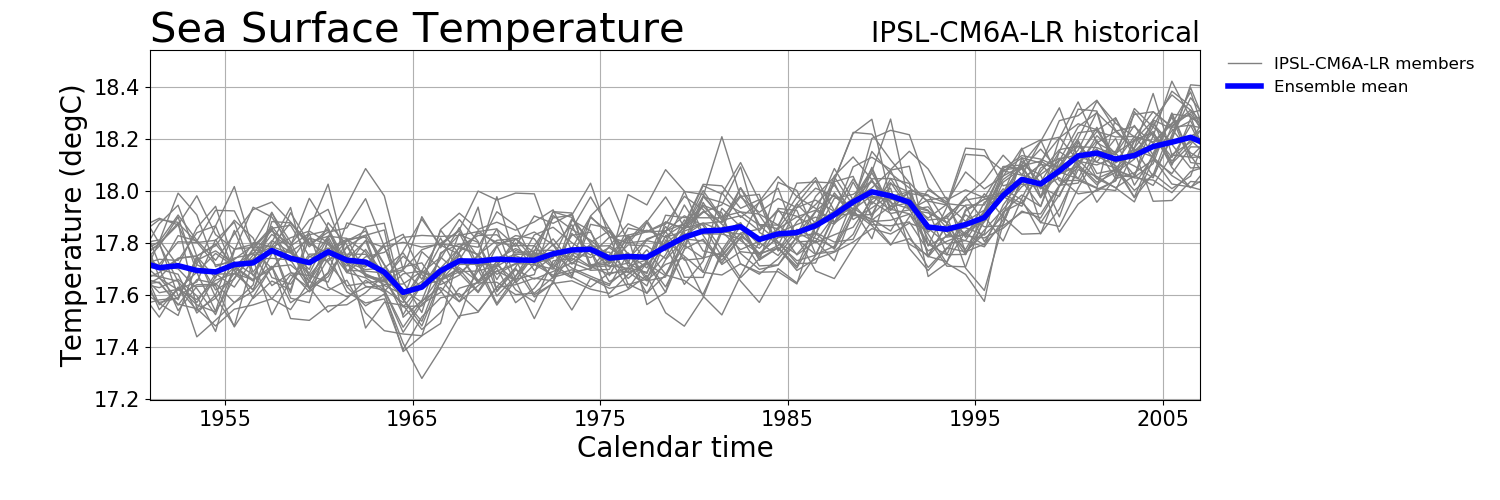

In [21]:
myplot = ts_plot(ens4plot,
                 offset = -273.15,
                 xlim = ['1951-01-01','2006-12-31'],
                 #ylim = [17.7,18.8],
                 xlabel = 'Calendar time',
                 ylabel = 'Temperature (degC)',
                 left_string = 'Sea Surface Temperature',
                 right_string = 'IPSL-CM6A-LR historical',
                 left_string_fontsize = 30,
                 right_string_fontsize = 20,
                 colors = ['grey']*len(ts_ens) + ['blue'],
                 lw = [1]*len(ts_ens) + [4],
                     legend_colors = ['grey', 'blue'],
                     legend_labels = ['IPSL-CM6A-LR members','Ensemble mean'],
                     legend_lw = [1, 4],
                     #legend_xy_pos: x,y Position of the corner of the box (by default = upper left corner). Example= “1.02,1”
                     #legend_loc: Choose the corner of the legend box to specify the position of the legend box; by default 2 (upper left corner), take values 1, 2, 3 or 4 (see resource loc of pyplot legend)
                     #legend_fontsize: Font size in the legend
                     #legend_ncol: Number of columns in the legend
                     #legend_frame: Draw the box around the legend? True/False
                )
iplot(myplot)

### or change the legend position

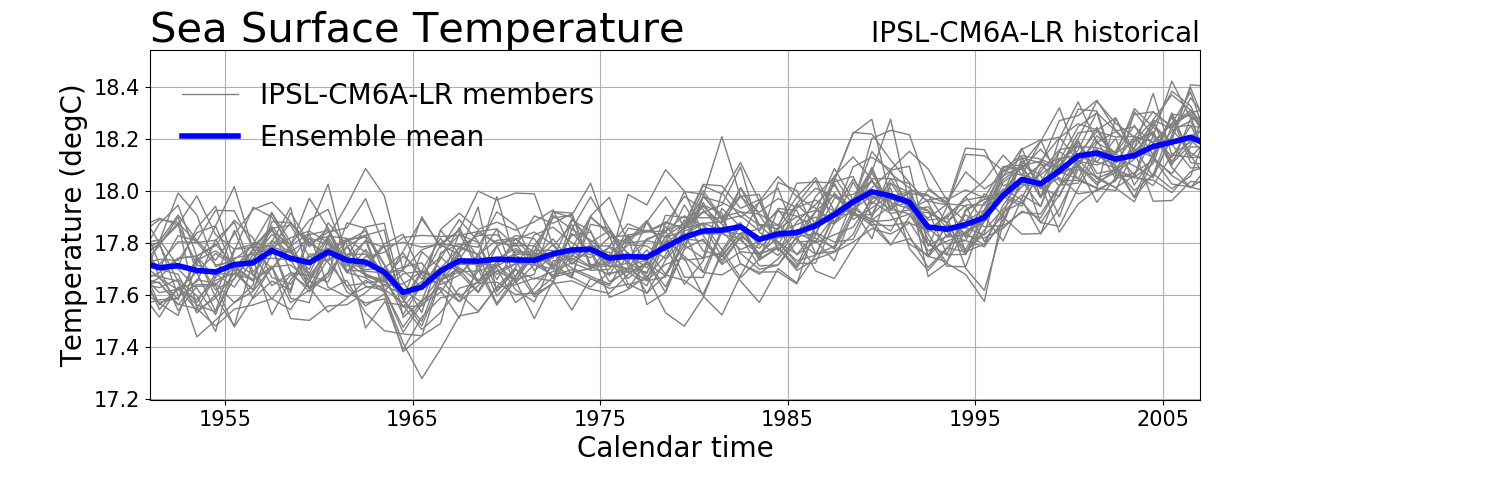

In [22]:
myplot = ts_plot(ens4plot,
                 offset = -273.15,
                 xlim = ['1951-01-01','2006-12-31'],
                 #ylim = [17.7,18.8],
                 xlabel = 'Calendar time',
                 ylabel = 'Temperature (degC)',
                 left_string = 'Sea Surface Temperature',
                 right_string = 'IPSL-CM6A-LR historical',
                 left_string_fontsize = 30,
                 right_string_fontsize = 20,
                 colors = ['grey']*len(ts_ens) + ['blue'],
                 lw = [1]*len(ts_ens) + [4],
                 legend_colors = ['grey', 'blue'],
                 legend_labels = ['IPSL-CM6A-LR members','Ensemble mean'],
                 legend_lw = [1, 4],
                     legend_xy_pos= [0.02,0.94],
                     legend_fontsize = 20,
                     #legend_ncol: Number of columns in the legend
                     #legend_frame: Draw the box around the legend? True/False
                 #center_string = '',
                 #center_string_fontsize: Center string size
                 #colors = 'red',
                 #lw = 2,
                 #    highlight_period = '1980-2000',
                 #    highlight_period_lw = 8,
                )
iplot(myplot)

### (same with 2 columns)

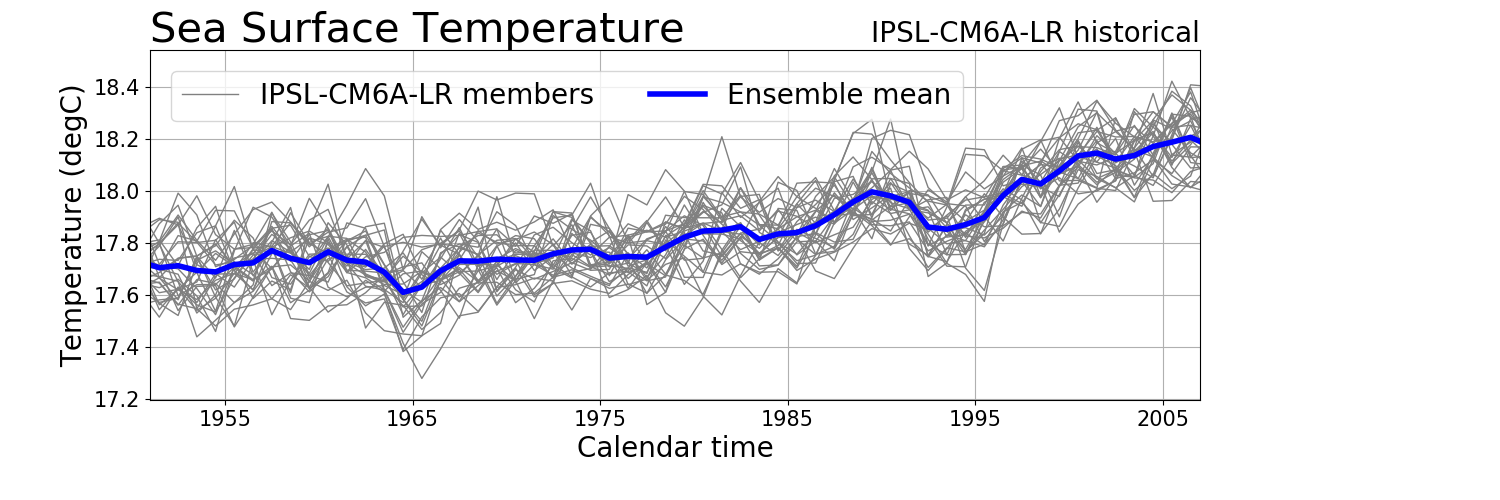

In [23]:
myplot = ts_plot(ens4plot,
                 offset = -273.15,
                 xlim = ['1951-01-01','2006-12-31'],
                 #ylim = [17.7,18.8],
                 xlabel = 'Calendar time',
                 ylabel = 'Temperature (degC)',
                 left_string = 'Sea Surface Temperature',
                 right_string = 'IPSL-CM6A-LR historical',
                 left_string_fontsize = 30,
                 right_string_fontsize = 20,
                 colors = ['grey']*len(ts_ens) + ['blue'],
                 lw = [1]*len(ts_ens) + [4],
                 legend_colors = ['grey', 'blue'],
                 legend_labels = ['IPSL-CM6A-LR members','Ensemble mean'],
                 legend_lw = [1, 4],
                 legend_xy_pos= [0.02,0.94],
                 legend_fontsize = 20,
                     legend_ncol = 2,
                     legend_frame = True,
                 #center_string = '',
                 #center_string_fontsize: Center string size
                 #colors = 'red',
                 #lw = 2,
                 #    highlight_period = '1980-2000',
                 #    highlight_period_lw = 8,
                )
iplot(myplot)

### 3.d: Last example: highlight one member of an ensemble

In [24]:
# -- We start by computing the ensemble mean
ensmean = ccdo_ens(ts_ens, operator='ensmean')

# -- The easiest thing to do is to keep the ensemble (with all the time series),
#    and add the ensemble mean.
#    HOWEVER, you can't add the ensemble mean of an ensemble to this same ensemble.
#    We thus copy the original ensemble to create an ens4plot ensemble for the plot
ens4plot = ts_ens.copy()
# -- Highlight a specific member: r8i1p1f1 --> move it at the end of the ensemble
ens4plot.pop('r8i1p1f1')
ens4plot['r8i1p1f1'] = ts_ens['r8i1p1f1']
# -- And add the ensemble mean like this
ens4plot['ensmean'] = ensmean

ens4plot.order

[u'r1i1p1f1',
 u'r2i1p1f1',
 u'r3i1p1f1',
 u'r4i1p1f1',
 u'r5i1p1f1',
 u'r6i1p1f1',
 u'r7i1p1f1',
 u'r9i1p1f1',
 u'r10i1p1f1',
 u'r11i1p1f1',
 u'r12i1p1f1',
 u'r13i1p1f1',
 u'r14i1p1f1',
 u'r15i1p1f1',
 u'r16i1p1f1',
 u'r17i1p1f1',
 u'r18i1p1f1',
 u'r19i1p1f1',
 u'r20i1p1f1',
 u'r21i1p1f1',
 u'r22i1p1f1',
 u'r23i1p1f1',
 u'r24i1p1f1',
 u'r25i1p1f1',
 u'r26i1p1f1',
 u'r27i1p1f1',
 u'r28i1p1f1',
 u'r29i1p1f1',
 u'r30i1p1f1',
 u'r31i1p1f1',
 u'r32i1p1f1',
 'r8i1p1f1',
 'ensmean']

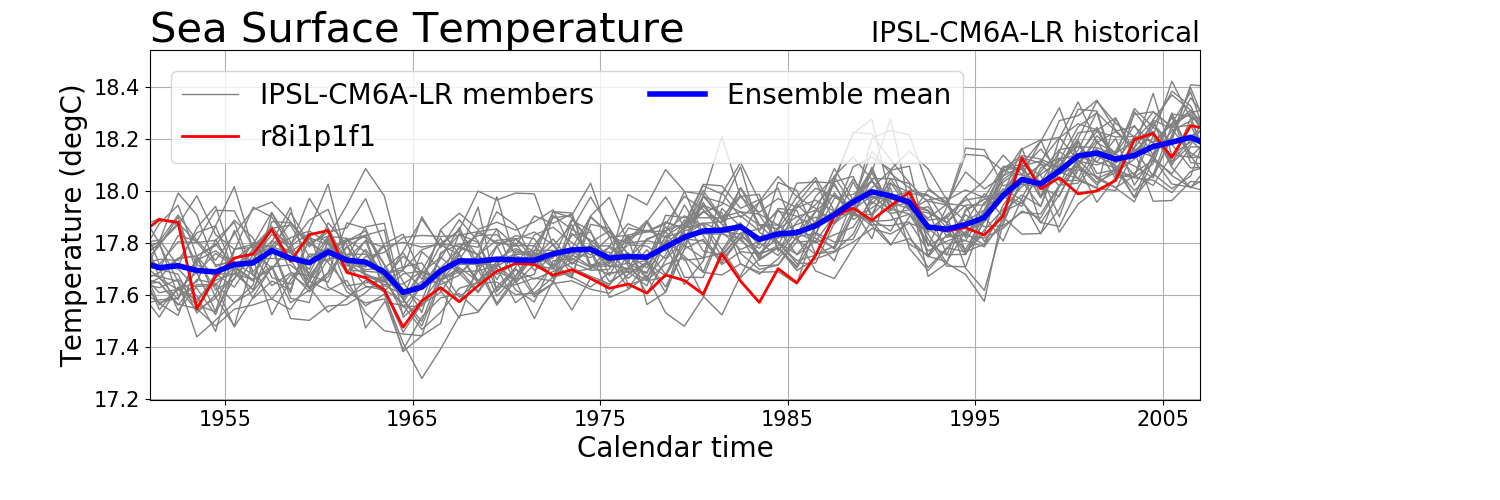

In [25]:
myplot = ts_plot(ens4plot,
                 offset = -273.15,
                 xlim = ['1951-01-01','2006-12-31'],
                 #ylim = [17.7,18.8],
                 xlabel = 'Calendar time',
                 ylabel = 'Temperature (degC)',
                 left_string = 'Sea Surface Temperature',
                 right_string = 'IPSL-CM6A-LR historical',
                 left_string_fontsize = 30,
                 right_string_fontsize = 20,
                 colors = ['grey']*(len(ts_ens)-1) + ['red','blue'],
                 lw = [1]*(len(ts_ens)-1) + [2, 4],
                 legend_colors = ['grey', 'red', 'blue'],
                 legend_labels = ['IPSL-CM6A-LR members', 'r8i1p1f1', 'Ensemble mean'],
                 legend_lw = [1, 2, 4],
                 legend_xy_pos= [0.02,0.94],
                 legend_fontsize = 20,
                 legend_ncol = 2,
                 legend_frame = True,
                )
iplot(myplot)

## Questions?
### -> https://climaf.readthedocs.io/en/master/scripts/ensemble_ts_plot.html
### -> https://climaf.readthedocs.io/en/master/functions/ts_plot.html
### -> climaf@meteo.fr